In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def H_o(a,t):
    t = np.linspace(0,1,1000)
    a = (4*np.e**4)/((np.e**4)-1)
    r = a*np.e**(-4*t)
    return r

def H_1(t):
   # t = np.linspace(0,1,1000)
    f = 2*np.sin(np.pi*t)**2
    return f

tcutH_0 = 0.67 #value for integral >= 0.95
tcutH_1 = 0.67
a = (4*np.e**4)/((np.e**4)-1)
t = np.linspace(0,1,100)
bins = 20
fbig = 2

In [3]:
def nextValueForH0():
    rand = np.random.rand()
    #t = (-1/4)*np.log(-rand*4/a+1)
    #t = (1/4)*np.log((4*np.e**4)/(((np.e**4)-1)*rand))
    t = -np.log((-(np.exp(4)-1)*rand/np.exp(4)+1))/4
    return t

#H1 max value is 2 so fbig = 2
def nextValueForH1():
    attempt = False
    while(not attempt):
        randV = np.random.rand()
        maximum = fbig*np.random.rand()
        if (maximum < H_1(randV)):
            return randV
    
    

In [4]:
err_1 = 0
H0_Accepted = []


for i in range(10000):
    t = nextValueForH0()
    
    if(t > tcutH_0):
        err_1 += 1
        
        
    H0_Accepted.append(t)
        
print('There are', err_1, "type 1 errors rejected at the 95% confidence level")

There are 499 type 1 errors rejected at the 95% confidence level


Text(0.5, 1.0, 'Histogram for H_o')

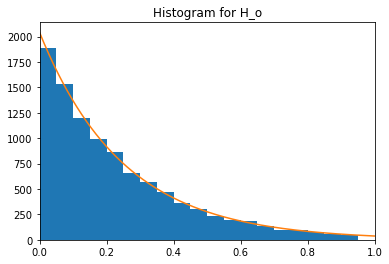

In [5]:
plt.hist(H0_Accepted,bins = np.arange(0,1,0.05))
plt.xlim(0,1)
x = np.linspace(0,1,1000)
y = 10000*.05*a*np.exp(-4*x)
plt.plot(x,y)
plt.title('Histogram for H_o')

In [6]:
err_2 = 0
H1_Accepted = []

for i in range(10000):
    t = nextValueForH1()
    H1_Accepted.append(t)
    if(t < tcutH_1):
        err_2 += 1
    
        #H1_Accepted.append(t)
print("The number of rejections at the 95% confidence level and hence the number of type 2 errors is",err_2)


The number of rejections at the 95% confidence level and hence the number of type 2 errors is 8073


10000


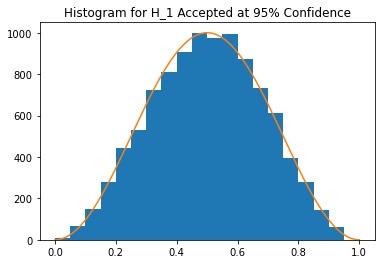

In [7]:
plt.hist(H1_Accepted,bins = np.arange(0,1,0.05))
x1 = np.linspace(0,1,1000)
y1 = 10000*0.05*H_1(x1)
plt.plot(x1,y1)
plt.title("Histogram for H_1 Accepted at 95% Confidence")
print(len(H1_Accepted))